<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/TransferLearningusingDenseNet121(day24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar100

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [17]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

In [20]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')
])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 234s 138ms/step - accuracy: 0.1895 - loss: 3.5191 - val_accuracy: 0.3275 - val_loss: 2.6425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 137ms/step - accuracy: 0.3645 - loss: 2.4654 - val_accuracy: 0.3531 - val_loss: 2.5510
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 215s 138ms/step - accuracy: 0.4077 - loss: 2.2714 - val_accuracy: 0.3648 - val_loss: 2.4798
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 217s 139ms/step - accuracy: 0.4293 - loss: 2.1489 - val_accuracy: 0.3647 - val_loss: 2.4999
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 138ms/step - accuracy: 0.4483 - loss: 2.0659 - val_accuracy: 0.3643 - val_loss: 2.5209
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 214s 137ms/step - accuracy: 0.4684 - loss: 1.9826 - val_accuracy: 0.3740 - val_loss: 2.5000
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 137ms/step - accuracy: 0.4807 - loss: 1.9282 - val_accuracy: 0.3648 - val_loss: 2.5671
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 216s 138ms/step - ac

In [31]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


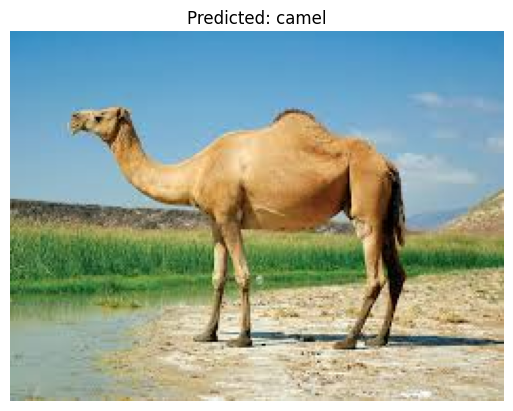

Predicted label for custom image: camel


In [30]:
import cv2
def predict_from_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
      raise FileNotFoundError(f"Image not found at {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_label = class_names[np.argmax(prediction)]
    plt.imshow(cv2.imread(image_path)[..., ::-1])
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()
    return predicted_label

image_path = "/content/camel.jpg"
print("Predicted label for custom image:", predict_from_image(image_path))